In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [18]:
# https://www.kaggle.com/datasets/neuromusic/avocado-prices
data = pd.read_csv('avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [19]:
def changeParameterValues(data_frame):
    data_with_codes = data_frame.copy()
    data_with_codes['region'] = data_with_codes['region'].astype('category').cat.codes
    data_with_codes['type'] = data_with_codes['type'].astype('category').cat.codes
    return data_with_codes

In [20]:
new_data = changeParameterValues(data)
Y = new_data['region']
X = new_data.drop(['region'], axis=1).drop(['Date'], axis=1).drop(['Unnamed: 0'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [21]:
# Вычисление оптимальной глубины деревьев
bias_res, var_res, err_res = [], [], []

for max_depth in range(1, 10):
    tree_clf = RandomForestRegressor(max_depth=max_depth, random_state = 42, n_estimators=10).fit(X_train, y_train)
    test_predict = tree_clf.predict(X_test)
    bias = np.mean(np.abs(y_test - test_predict))
    var = np.var(test_predict)
    err = bias ** 2 + var

    bias_res.append(bias ** 2)
    var_res.append(var)
    err_res.append(err)

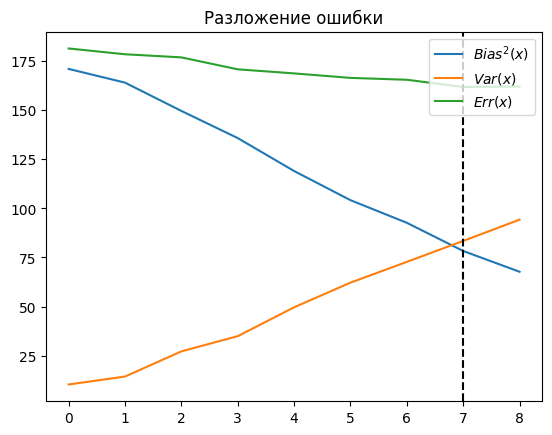

In [22]:
optimal_res = np.argmin(np.abs(np.array(bias_res) - np.array(var_res)))
plt.plot(bias_res, label='$Bias^2(x)$')
plt.plot(var_res, label='$Var(x)$')
plt.plot(err_res, label='$Err(x)$')
plt.axvline(optimal_res, linestyle='--', color='black')
plt.legend(loc='upper right')
plt.title('Разложение ошибки')
plt.show()

In [23]:
print(f'Оптимальная глубина деревьев: {optimal_res}')

Оптимальная глубина деревьев: 7
